# Churn_Modelling
#### Reference: https://www.kaggle.com/aakash50897/churn-modellingcsv

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
dataset[0:10]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Data Preprocessing

In [2]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] # Avoiding dummy variable trap!

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


## Making the ANN

In [23]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

def build_classifier():
    # Initializing the ANN
    classifier = Sequential()

    # Adding the input layer and the first hidden layer with dropout
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    # classifier.add(Dropout(rate = 0.2))

    # Adding the second hidden layer with dropout
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    # classifier.add(Dropout(rate = 0.2))

    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [24]:
classifier = build_classifier()
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Fitting ANN to the Training set
h = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), 
                   batch_size = 25, epochs = 300, verbose = 1)

Train on 8000 samples, validate on 2000 samples
Epoch 1/300
8000/8000 [==============================] - 2s 247us/step - loss: 0.5402 - acc: 0.7960 - val_loss: 0.4403 - val_acc: 0.7975
Epoch 2/300
8000/8000 [==============================] - 0s 53us/step - loss: 0.4346 - acc: 0.7960 - val_loss: 0.4261 - val_acc: 0.7975
Epoch 3/300
8000/8000 [==============================] - 0s 52us/step - loss: 0.4258 - acc: 0.7960 - val_loss: 0.4195 - val_acc: 0.7975
Epoch 4/300
8000/8000 [==============================] - 0s 52us/step - loss: 0.4199 - acc: 0.8072 - val_loss: 0.4159 - val_acc: 0.8360
Epoch 5/300
8000/8000 [==============================] - 0s 52us/step - loss: 0.4151 - acc: 0.8291 - val_loss: 0.4092 - val_acc: 0.8345
Epoch 6/300
8000/8000 [==============================] - 0s 56us/step - loss: 0.4112 - acc: 0.8326 - val_loss: 0.4045 - val_acc: 0.8420
Epoch 7/300
8000/8000 [==============================] - 0s 48us/step - loss: 0.4086 - acc: 0.8336 - val_loss: 0.4027 - val_acc: 0.8440

8000/8000 [==============================] - 0s 53us/step - loss: 0.3935 - acc: 0.8345 - val_loss: 0.3944 - val_acc: 0.8450
Epoch 61/300
8000/8000 [==============================] - 0s 45us/step - loss: 0.3937 - acc: 0.8364 - val_loss: 0.3962 - val_acc: 0.8460
Epoch 62/300
8000/8000 [==============================] - 0s 50us/step - loss: 0.3930 - acc: 0.8367 - val_loss: 0.3975 - val_acc: 0.8440
Epoch 63/300
8000/8000 [==============================] - 0s 48us/step - loss: 0.3930 - acc: 0.8354 - val_loss: 0.3947 - val_acc: 0.8450
Epoch 64/300
8000/8000 [==============================] - 0s 52us/step - loss: 0.3936 - acc: 0.8367 - val_loss: 0.3946 - val_acc: 0.8450
Epoch 65/300
8000/8000 [==============================] - 0s 57us/step - loss: 0.3931 - acc: 0.8364 - val_loss: 0.3975 - val_acc: 0.8460
Epoch 66/300
8000/8000 [==============================] - 0s 55us/step - loss: 0.3927 - acc: 0.8352 - val_loss: 0.3938 - val_acc: 0.8455
Epoch 67/300
8000/8000 [==============================

8000/8000 [==============================] - 0s 44us/step - loss: 0.3716 - acc: 0.8431 - val_loss: 0.3702 - val_acc: 0.8435
Epoch 120/300
8000/8000 [==============================] - 0s 48us/step - loss: 0.3686 - acc: 0.8470 - val_loss: 0.3669 - val_acc: 0.8475
Epoch 121/300
8000/8000 [==============================] - 1s 64us/step - loss: 0.3662 - acc: 0.8482 - val_loss: 0.3631 - val_acc: 0.8470
Epoch 122/300
8000/8000 [==============================] - 0s 46us/step - loss: 0.3631 - acc: 0.8470 - val_loss: 0.3592 - val_acc: 0.8505
Epoch 123/300
8000/8000 [==============================] - 0s 48us/step - loss: 0.3600 - acc: 0.8511 - val_loss: 0.3590 - val_acc: 0.8520
Epoch 124/300
8000/8000 [==============================] - 0s 50us/step - loss: 0.3591 - acc: 0.8499 - val_loss: 0.3578 - val_acc: 0.8475
Epoch 125/300
8000/8000 [==============================] - 0s 46us/step - loss: 0.3559 - acc: 0.8539 - val_loss: 0.3556 - val_acc: 0.8475
Epoch 126/300
8000/8000 [=======================

8000/8000 [==============================] - 0s 46us/step - loss: 0.3372 - acc: 0.8626 - val_loss: 0.3382 - val_acc: 0.8565
Epoch 179/300
8000/8000 [==============================] - 0s 46us/step - loss: 0.3379 - acc: 0.8627 - val_loss: 0.3383 - val_acc: 0.8535
Epoch 180/300
8000/8000 [==============================] - 0s 48us/step - loss: 0.3373 - acc: 0.8605 - val_loss: 0.3345 - val_acc: 0.8580
Epoch 181/300
8000/8000 [==============================] - 0s 44us/step - loss: 0.3386 - acc: 0.8617 - val_loss: 0.3357 - val_acc: 0.8545
Epoch 182/300
8000/8000 [==============================] - 0s 48us/step - loss: 0.3381 - acc: 0.8616 - val_loss: 0.3357 - val_acc: 0.8605
Epoch 183/300
8000/8000 [==============================] - ETA: 0s - loss: 0.3379 - acc: 0.860 - 0s 44us/step - loss: 0.3377 - acc: 0.8607 - val_loss: 0.3357 - val_acc: 0.8545
Epoch 184/300
8000/8000 [==============================] - 0s 47us/step - loss: 0.3367 - acc: 0.8620 - val_loss: 0.3376 - val_acc: 0.8580
Epoch 185/

8000/8000 [==============================] - 0s 46us/step - loss: 0.3362 - acc: 0.8624 - val_loss: 0.3367 - val_acc: 0.8570
Epoch 237/300
8000/8000 [==============================] - 0s 50us/step - loss: 0.3356 - acc: 0.8612 - val_loss: 0.3379 - val_acc: 0.8520
Epoch 238/300
8000/8000 [==============================] - 0s 48us/step - loss: 0.3363 - acc: 0.8612 - val_loss: 0.3342 - val_acc: 0.8595
Epoch 239/300
8000/8000 [==============================] - 0s 50us/step - loss: 0.3365 - acc: 0.8617 - val_loss: 0.3357 - val_acc: 0.8575
Epoch 240/300
8000/8000 [==============================] - 0s 51us/step - loss: 0.3361 - acc: 0.8599 - val_loss: 0.3351 - val_acc: 0.8615
Epoch 241/300
8000/8000 [==============================] - 0s 45us/step - loss: 0.3362 - acc: 0.8610 - val_loss: 0.3320 - val_acc: 0.8605
Epoch 242/300
8000/8000 [==============================] - 0s 61us/step - loss: 0.3358 - acc: 0.8611 - val_loss: 0.3324 - val_acc: 0.8610
Epoch 243/300
8000/8000 [=======================

8000/8000 [==============================] - 0s 48us/step - loss: 0.3347 - acc: 0.8635 - val_loss: 0.3383 - val_acc: 0.8540
Epoch 296/300
8000/8000 [==============================] - 0s 61us/step - loss: 0.3350 - acc: 0.8621 - val_loss: 0.3338 - val_acc: 0.8550
Epoch 297/300
8000/8000 [==============================] - 0s 52us/step - loss: 0.3362 - acc: 0.8612 - val_loss: 0.3379 - val_acc: 0.8545
Epoch 298/300
8000/8000 [==============================] - 0s 46us/step - loss: 0.3351 - acc: 0.8631 - val_loss: 0.3375 - val_acc: 0.8565A: 0s - loss: 0.3472 - acc: 0. - ETA: 0s - loss: 0.3344 - acc: 0.863
Epoch 299/300
8000/8000 [==============================] - 0s 48us/step - loss: 0.3357 - acc: 0.8619 - val_loss: 0.3365 - val_acc: 0.8545
Epoch 300/300
8000/8000 [==============================] - 0s 48us/step - loss: 0.3360 - acc: 0.8621 - val_loss: 0.3328 - val_acc: 0.8600


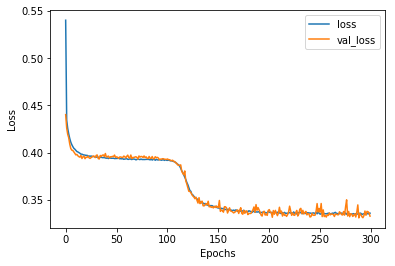

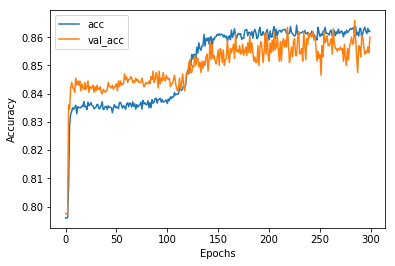

In [26]:
# Plotting the loss
plt.figure(1)
plt.plot(h.history['loss'], label = 'loss')
plt.plot(h.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the acc
plt.figure(2)
plt.plot(h.history['acc'], label = 'acc')
plt.plot(h.history['val_acc'], label = 'val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Making the Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
def Classification(clf, X, y):
    X_set, y_set = X, y
    y_hat = clf.predict(X_set)
    y_hat = np.reshape(y_hat, -1)
    y_hat[y_hat >= 0.5] = 1
    y_hat[y_hat < 0.5] = 0
    cm = confusion_matrix(y_set, y_hat)
    accuracy = (cm[0, 0] + cm[1, 1])/cm.sum()
    TPR = cm[0, 0]/cm[:, 0].sum() # Sensitivitive, Recall
    TNR = cm[1, 1]/cm[:, 1].sum() # Specificitive
    PPV = cm[0, 0]/cm[0, :].sum() # Positive Predictive Value, Precision
    NPV = cm[1, 1]/cm[1, :].sum() # Negative Predictive Value,  
    F1_score = 2/(1/PPV + 1/TPR)
    summary = {'Accuracy': accuracy, 
               'Positive_Predictive_Value': PPV, 
               'Negative_Predictive_Value': NPV,            
               'Sensitivitive': TPR, 
               'Specificitive': TNR,            
               'F1_score': F1_score, 
               'CM': cm}
    return summary

### Training Set

In [27]:
Classification(clf = classifier, X = X_train, y = y_train)

{'Accuracy': 0.861375,
 'Positive_Predictive_Value': 0.9693781407035176,
 'Negative_Predictive_Value': 0.43995098039215685,
 'Sensitivitive': 0.8710314660646253,
 'Specificitive': 0.7864184008762322,
 'F1_score': 0.9175771088814566,
 'CM': array([[6173,  195],
        [ 914,  718]], dtype=int64)}

### Test Set

In [28]:
Classification(clf = classifier, X = X_test, y = y_test)

{'Accuracy': 0.86,
 'Positive_Predictive_Value': 0.9561128526645768,
 'Negative_Predictive_Value': 0.48148148148148145,
 'Sensitivitive': 0.8789625360230547,
 'Specificitive': 0.7358490566037735,
 'F1_score': 0.9159159159159157,
 'CM': array([[1525,   70],
        [ 210,  195]], dtype=int64)}

## Evaluating the ANN

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

classifier = KerasClassifier(build_fn = build_classifier, batch_size = 25, epochs = 300)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)

plt.figure(1)
plt.plot(accuracies, '-o')
plt.axhline(accuracies.mean(), color = 'black', ls = '-')
plt.axhline(accuracies.mean() + 2 * accuracies.std(), color = 'black', ls = '--')
plt.axhline(accuracies.mean() - 2 * accuracies.std(), color = 'black', ls = '--')
plt.xlabel('CV')
plt.ylabel('Accuracy')
plt.show()
print('ANN: CV score = %0.3f (+/- %0.3f)' % (accuracies.mean(), 2 * accuracies.std()))

## Part 4 - Evaluating, Improving and Tuning the ANN

In [11]:
# Improving the ANN
# Dropout Regularization to reduce overfitting if needed
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 50], 
              'epochs': [300], 
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier, 
                           param_grid = parameters, 
                           scoring = 'accuracy',
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 0)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
results = grid_search.cv_results_

Epoch 1/100
8000/8000 [==============================] - 1s 106us/step - loss: 0.5476 - acc: 0.7954
Epoch 2/100
8000/8000 [==============================] - 0s 46us/step - loss: 0.4351 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 0s 47us/step - loss: 0.4285 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 0s 43us/step - loss: 0.4247 - acc: 0.8001
Epoch 5/100
8000/8000 [==============================] - 0s 45us/step - loss: 0.4197 - acc: 0.8210
Epoch 6/100
8000/8000 [==============================] - 0s 44us/step - loss: 0.4149 - acc: 0.8289
Epoch 7/100
8000/8000 [==============================] - 0s 51us/step - loss: 0.4109 - acc: 0.8302
Epoch 8/100
8000/8000 [==============================] - 0s 57us/step - loss: 0.4077 - acc: 0.8321
Epoch 9/100
8000/8000 [==============================] - 0s 58us/step - loss: 0.4057 - acc: 0.8315
Epoch 10/100
8000/8000 [==============================] - 0s 59us/step - loss: 0.4036 - acc: 0.8339
Epoch 11

In [12]:
best_parameters

{'batch_size': 25, 'epochs': 100, 'optimizer': 'adam'}